<a href="https://colab.research.google.com/github/nileshkulkarni/AI4ALL_soln/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis of IMDB movie reviews**

Source : https://thecleverprogrammer.com/2020/12/07/sentiment-analysis-with-python/

# Steps:
 1. Download Dataset
 2. Create Word Cloud
 3. Create WordCounts
 4. Create a classifier

In [ ]:
import pandas as pd
import zipfile
import os
import os.path as osp

Mount the google drive to host the data.

1.   List item
2.   List item



In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# dataset_path = osp.join('/content/gdrive/MyDrive/Colab Notebooks/datasets/imdb/')
# os.listdir(dataset_path)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
train_dl_path = "https://www.dropbox.com/s/6vjnhvukcuciffs/Train.csv?dl=0"
test_dl_path = "https://www.dropbox.com/s/8n8dt6sik73zk87/Test.csv?dl=0"
valid_dl_path = "https://www.dropbox.com/s/1fhrrth0xljih4c/Valid.csv?dl=0"


In [ ]:
os.system('wget -O  train.csv {}'.format(train_dl_path))

0

In [ ]:
os.system('wget -O  train.csv {}'.format(train_dl_path))
os.system('wget -O  test.csv {}'.format(test_dl_path))
os.system('wget -O  valid.csv {}'.format(valid_dl_path))
train_path = '/content/train.csv'
test_path = '/content/test.csv'
valid_path = '/content/valid.csv'

In [ ]:


count=CountVectorizer()
data=pd.read_csv(train_path)
data.head()
data_test=pd.read_csv(test_path)
data_val=pd.read_csv(valid_path)

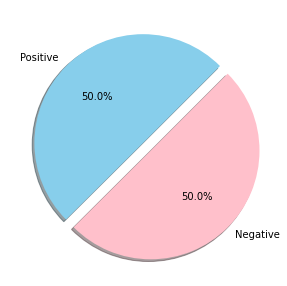

In [ ]:

fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

Prepocess the dataset

In [ ]:

import re
def preprocessor(text):
    text=re.sub('<[^>]*>','',text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +\
      ' '.join(emojis).replace('-','')
    return text   
data['text']=data['text'].apply(preprocessor)

In [ ]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
      return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

Visualize Negative and Positive Words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Positive words are as follows


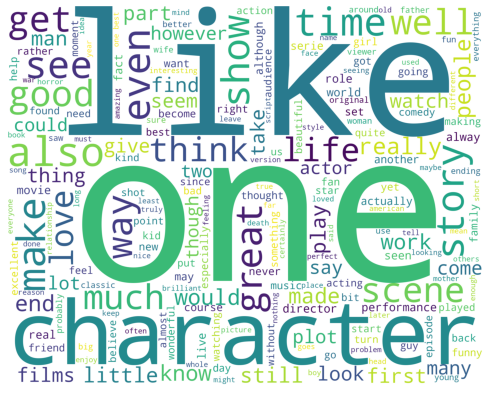

Negative words are as follows


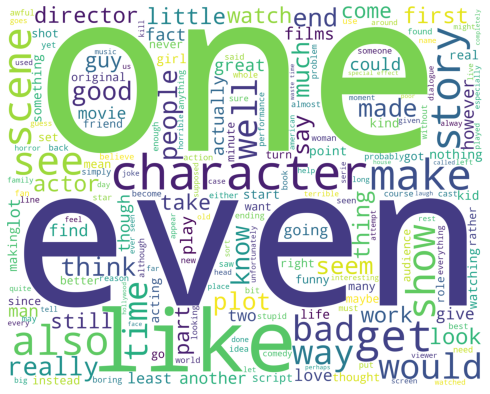

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

Let's do machine learning now, fit a model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
tfidf = tfidf.fit(data.text)
x=tfidf.transform(data.text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)
X_train = x
y_train = y

x_test = data_test['text'].apply(preprocessor)
x_test = tfidf.transform(x_test)
y_test = data_test.label.values

Train the model

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.0min finished


In [ ]:
x_test = data_test['text'].apply(preprocessor)
x_test = tfidf.transform(x_test)

Test model

In [ ]:
y_pred = clf.predict(X_train)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.94735


In [ ]:
y_pred = clf.predict(x_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
 for ix, l in enumerate(zip(y_pred, data_test['text'])):
   print(l)
   if ix > 10:
     break
